In [1]:
import gc # gc is the Garbage Collector library. It is used to empty memory from GPU and CPU.
import numpy as np # Numpy is the standard Python library to do operation with arrays.
import matplotlib.pyplot as plt # Matplotlib is the standard Python library to plot data.
## Keras is the library that we will use to build and train CNNs
from keras.datasets import mnist
from keras.utils import to_categorical
import keras.backend as K
from keras import models
from keras import layers
from keras.optimizers import SGD
import keras
from keras import backend as K
from keras.models import Model
from keras.layers import Input, Conv2D, Conv2DTranspose, Add, MaxPooling2D
from keras.optimizers import Adam
## We will use scikit-learn tools to plot the performance of our network
from sklearn.metrics import confusion_matrix
from skimage.draw import polygon
% matplotlib inline

Using TensorFlow backend.
UsageError: Line magic function `%` not found.


(0.0, 0.13298076)

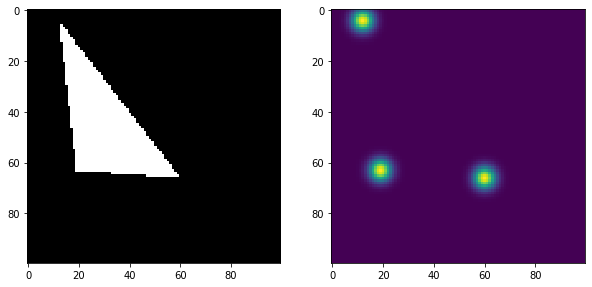

In [2]:
def generate_random_triangle(rows, columns):
    sigma = 3
    image = np.zeros((rows, columns), dtype=np.float32)
    labels = np.zeros((rows, columns, 3), dtype=np.float32)
    xx, yy = np.arange(rows), np.arange(columns)
    mesh_xx, mesh_yy = np.meshgrid(xx, yy)
    r = np.random.randint(0, rows, 3)
    c = np.random.randint(0, rows, 3)
    r = np.append(r, r[0])
    c = np.append(c, c[0])
    rr, cc = polygon(r, c)
    image[rr, cc] = 1
    labels[:, :, 0] = np.exp(-((mesh_yy-r[0])**2 + (mesh_xx-c[0])**2)/(2*sigma**2))/(sigma * np.sqrt(2*np.pi))
    labels[:, :, 1] = np.exp(-((mesh_yy-r[1])**2 + (mesh_xx-c[1])**2)/(2*sigma**2))/(sigma * np.sqrt(2*np.pi))
    labels[:, :, 2] = np.exp(-((mesh_yy-r[2])**2 + (mesh_xx-c[2])**2)/(2*sigma**2))/(sigma * np.sqrt(2*np.pi))
    labels = np.sum(labels, axis=2)
    return image, labels
n_rows, n_columns = 100, 100
img, labels = generate_random_triangle(n_rows, n_columns)
fig, ax = plt.subplots(1, 2, figsize=(10,10))
ax[0].imshow(img, cmap='gray')
ax[1].imshow(labels)
np.min(labels), np.max(labels)

In [3]:
def generate_set(num_images, n_rows, n_columns):
    x, y = zip(*[generate_random_triangle(n_rows, n_columns) for i in range(num_images)])
    x = np.expand_dims(np.asarray(x), axis=3)
    y = np.expand_dims(np.asarray(y), axis=3)
    return x, y

x_train, y_train = generate_set(100, n_rows, n_columns)
x_validation, y_validation = generate_set(10, n_rows, n_columns)
x_test, y_test = generate_set(10, n_rows, n_columns)
print(x_train.shape, y_train.shape)
print(x_validation.shape, y_validation.shape)
print(x_test.shape, y_test.shape)


(100, 100, 100, 1) (100, 100, 100, 1)
(10, 100, 100, 1) (10, 100, 100, 1)
(10, 100, 100, 1) (10, 100, 100, 1)


In [4]:
filters = 3
output_channels = 1
x_in = Input((n_rows, n_columns, 1))

x1 = Conv2D(filters, kernel_size=3, padding="same", activation="relu")(x_in)
x1_pool = MaxPooling2D(pool_size=2, strides=2, padding="same")(x1)
x2 = Conv2D(filters*2, kernel_size=3, padding="same", activation="relu")(x1_pool)
x2_pool = MaxPooling2D(pool_size=2, strides=2, padding="same")(x2)
x3 = Conv2D(filters*4, kernel_size=3, padding="same", activation="relu")(x2_pool)

x4 = Conv2DTranspose(filters*2, kernel_size=3, strides=2, padding="same", 
                     activation="relu", kernel_initializer="glorot_normal")(x3)
x4 = Conv2D(filters*2, kernel_size=3, padding="same", activation="relu")(x4)
x_out = Conv2DTranspose(output_channels, kernel_size=3, strides=2, padding="same", 
                        activation="linear", kernel_initializer="glorot_normal")(x4)
# Compile
net = Model(inputs=x_in, outputs=x_out, name="TrianglesCNN")
net.compile(optimizer='adam', loss="mean_squared_error")

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
history=net.fit(x_train, y_train,
                validation_data=(x_validation, y_validation), 
                epochs=300, 
                batch_size=10)

Instructions for updating:
Use tf.cast instead.
Train on 100 samples, validate on 10 samples
Epoch 1/300
100/100 [==============================] - 1s 11ms/step - loss: 2.0696e-04 - val_loss: 1.5169e-04
Epoch 2/300
100/100 [==============================] - 0s 255us/step - loss: 1.4631e-04 - val_loss: 1.3504e-04
Epoch 3/300
100/100 [==============================] - 0s 273us/step - loss: 1.3965e-04 - val_loss: 1.3121e-04
Epoch 4/300
100/100 [==============================] - 0s 274us/step - loss: 1.3733e-04 - val_loss: 1.2955e-04
Epoch 5/300
100/100 [==============================] - 0s 250us/step - loss: 1.3482e-04 - val_loss: 1.2809e-04
Epoch 6/300
100/100 [==============================] - 0s 271us/step - loss: 1.3168e-04 - val_loss: 1.2664e-04
Epoch 7/300
100/100 [==============================] - 0s 236us/step - loss: 1.2773e-04 - val_loss: 1.2561e-04
Epoch 8/300
100/100 [==============================] - 0s 292us/step - loss: 1.2401e-04 - val_loss: 1.2346e-04
Epoch 9/300
100/100 

Epoch 71/300
100/100 [==============================] - 0s 269us/step - loss: 3.0410e-05 - val_loss: 3.3783e-05
Epoch 72/300
100/100 [==============================] - 0s 230us/step - loss: 3.0442e-05 - val_loss: 3.3481e-05
Epoch 73/300
100/100 [==============================] - 0s 285us/step - loss: 3.0179e-05 - val_loss: 3.3648e-05
Epoch 74/300
100/100 [==============================] - 0s 238us/step - loss: 2.9788e-05 - val_loss: 3.2973e-05
Epoch 75/300
100/100 [==============================] - 0s 225us/step - loss: 2.9572e-05 - val_loss: 3.2771e-05
Epoch 76/300
100/100 [==============================] - 0s 231us/step - loss: 2.9489e-05 - val_loss: 3.2688e-05
Epoch 77/300
100/100 [==============================] - 0s 243us/step - loss: 2.9431e-05 - val_loss: 3.2851e-05
Epoch 78/300
100/100 [==============================] - 0s 231us/step - loss: 2.9051e-05 - val_loss: 3.2249e-05
Epoch 79/300
100/100 [==============================] - 0s 236us/step - loss: 2.8662e-05 - val_loss: 3.2

Epoch 144/300
100/100 [==============================] - 0s 237us/step - loss: 2.2367e-05 - val_loss: 2.9478e-05
Epoch 145/300
100/100 [==============================] - 0s 229us/step - loss: 2.2428e-05 - val_loss: 2.8517e-05
Epoch 146/300
100/100 [==============================] - 0s 234us/step - loss: 2.2358e-05 - val_loss: 2.9105e-05
Epoch 147/300
100/100 [==============================] - 0s 241us/step - loss: 2.2459e-05 - val_loss: 2.8971e-05
Epoch 148/300
100/100 [==============================] - 0s 234us/step - loss: 2.2423e-05 - val_loss: 2.9552e-05
Epoch 149/300
100/100 [==============================] - 0s 235us/step - loss: 2.2650e-05 - val_loss: 2.9345e-05
Epoch 150/300
100/100 [==============================] - 0s 229us/step - loss: 2.2418e-05 - val_loss: 2.9295e-05
Epoch 151/300
100/100 [==============================] - 0s 231us/step - loss: 2.2743e-05 - val_loss: 2.9320e-05
Epoch 152/300
100/100 [==============================] - 0s 228us/step - loss: 2.2411e-05 - val_

100/100 [==============================] - 0s 245us/step - loss: 1.9294e-05 - val_loss: 2.9590e-05
Epoch 217/300
100/100 [==============================] - 0s 270us/step - loss: 1.9363e-05 - val_loss: 2.8728e-05
Epoch 218/300
100/100 [==============================] - 0s 230us/step - loss: 1.9042e-05 - val_loss: 2.9093e-05
Epoch 219/300
100/100 [==============================] - 0s 233us/step - loss: 1.9110e-05 - val_loss: 2.8985e-05
Epoch 220/300
100/100 [==============================] - 0s 229us/step - loss: 1.8961e-05 - val_loss: 2.9330e-05
Epoch 221/300
100/100 [==============================] - 0s 227us/step - loss: 1.8926e-05 - val_loss: 2.8955e-05
Epoch 222/300
100/100 [==============================] - 0s 233us/step - loss: 1.9729e-05 - val_loss: 3.2240e-05
Epoch 223/300
100/100 [==============================] - 0s 228us/step - loss: 2.0323e-05 - val_loss: 2.9604e-05
Epoch 224/300
100/100 [==============================] - 0s 229us/step - loss: 1.9352e-05 - val_loss: 2.8879e-

100/100 [==============================] - 0s 235us/step - loss: 1.7429e-05 - val_loss: 3.0310e-05
Epoch 289/300
100/100 [==============================] - 0s 232us/step - loss: 1.6878e-05 - val_loss: 2.9884e-05
Epoch 290/300
100/100 [==============================] - 0s 239us/step - loss: 1.6945e-05 - val_loss: 3.0633e-05
Epoch 291/300
100/100 [==============================] - 0s 232us/step - loss: 1.6833e-05 - val_loss: 3.0746e-05
Epoch 292/300
100/100 [==============================] - 0s 235us/step - loss: 1.6966e-05 - val_loss: 3.0614e-05
Epoch 293/300
100/100 [==============================] - 0s 232us/step - loss: 1.6744e-05 - val_loss: 3.0521e-05
Epoch 294/300
100/100 [==============================] - 0s 228us/step - loss: 1.6208e-05 - val_loss: 3.0337e-05
Epoch 295/300
100/100 [==============================] - 0s 228us/step - loss: 1.6188e-05 - val_loss: 3.0338e-05
Epoch 296/300
100/100 [==============================] - 0s 242us/step - loss: 1.6304e-05 - val_loss: 3.0541e-

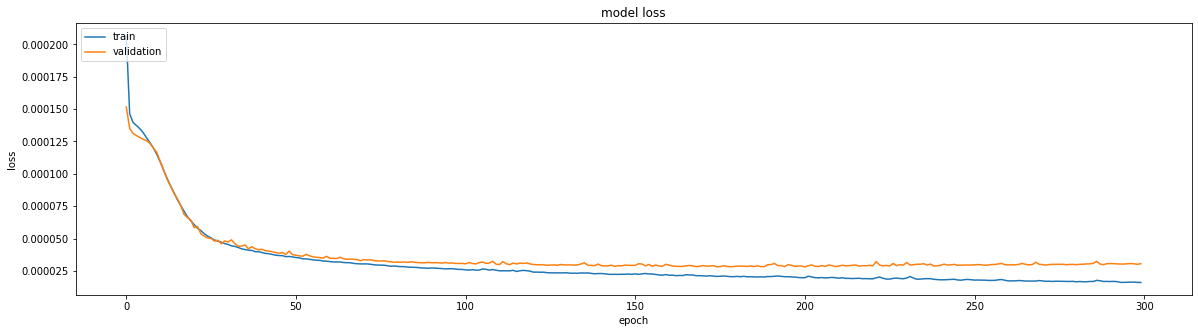

In [6]:
def plot_history(history):
    fig, axes = plt.subplots(1,1,figsize=(20,5))
    axes.plot(history.history['loss'])
    axes.plot(history.history['val_loss'])
    axes.set_title('model loss')
    axes.set_ylabel('loss')
    axes.set_xlabel('epoch')
    axes.legend(['train', 'validation'], loc='upper left')

plot_history(history)

In [7]:
test_loss = net.evaluate(x_test, y_test)
print('test_acc:', test_loss)

10/10 [==============================] - 0s 234us/step
test_acc: 2.4795381250442006e-05


In [8]:
labels_predict=net.predict(x_test)
print(labels_predict.shape)

(10, 100, 100, 1)


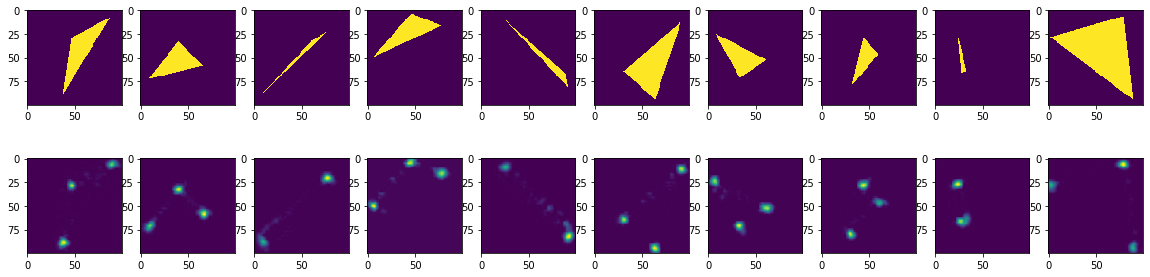

In [9]:
fig, axes = plt.subplots(2,10, figsize=(20,5))
for i in range(10):
    axes[0,i].imshow(x_test[i,:,:,0])
    axes[1,i].imshow(labels_predict[i,:,:,0])